In [ ]:
!pip install prophet pandas matplotlib plotly ipywidgets scikit-learn

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error
from ipywidgets import interact, IntSlider
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Replace with your own path or drive mount
df = pd.read_csv('/content/sample_data/milk_production.csv')

# Prophet expects columns "ds" (date) and "y" (value)
df.rename(columns={'Month': 'ds', 'Production': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# If monthly data, ensure end-of-month index
df = df.set_index('ds').resample('M').mean().reset_index()
df


/tmp/ipython-input-2-3128127186.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('ds').resample('M').mean().reset_index()


,ds,y
0,1962-01-31,589.0
1,1962-02-28,561.0
2,1962-03-31,640.0
3,1962-04-30,656.0
4,1962-05-31,727.0
...,...,...
163,1975-08-31,858.0
164,1975-09-30,817.0
165,1975-10-31,827.0
166,1975-11-30,797.0


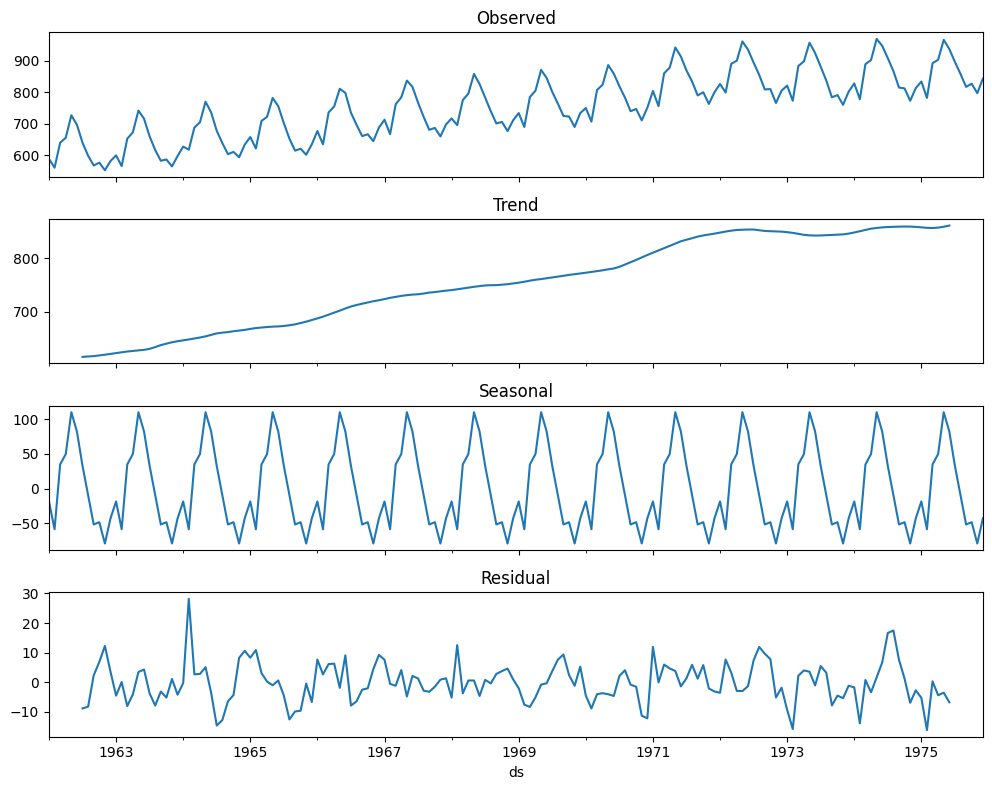

In [3]:
# Decompose to visualize seasonality
result = seasonal_decompose(df.set_index('ds')['y'], model='additive', period=12)

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

In [4]:


m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.8
)
m.add_seasonality(name='weekly', period=7, fourier_order=3)
m.add_country_holidays(country_name='IN')  # For India
# m.add_regressor('humidity')
# Add monthly seasonality component
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(df)

/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevfbr2ee/lt9zd8yf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevfbr2ee/2p6uqz_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82011', 'data', 'file=/tmp/tmpevfbr2ee/lt9zd8yf.json', 'init=/tmp/tmpevfbr2ee/2p6uqz_w.json', 'output', 'file=/tmp/tmpevfbr2ee/prophet_modelpgv9fdcz/prophet_model-20250708102915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] st

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)


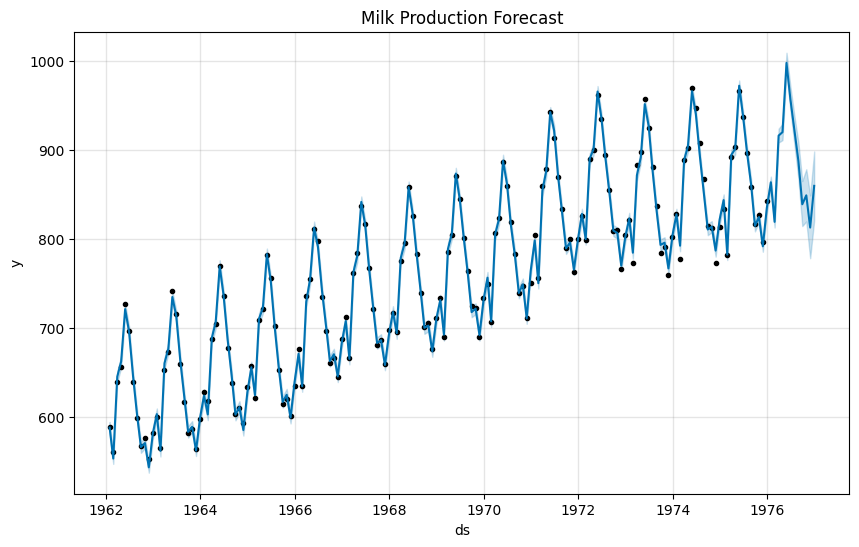

In [5]:
# Forecast next 12 months
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

# Static Matplotlib plot
fig, ax = plt.subplots(figsize=(10, 6))
m.plot(forecast, ax=ax)
plt.title('Milk Production Forecast')
plt.show()

Identified and removed 3 potential outliers.


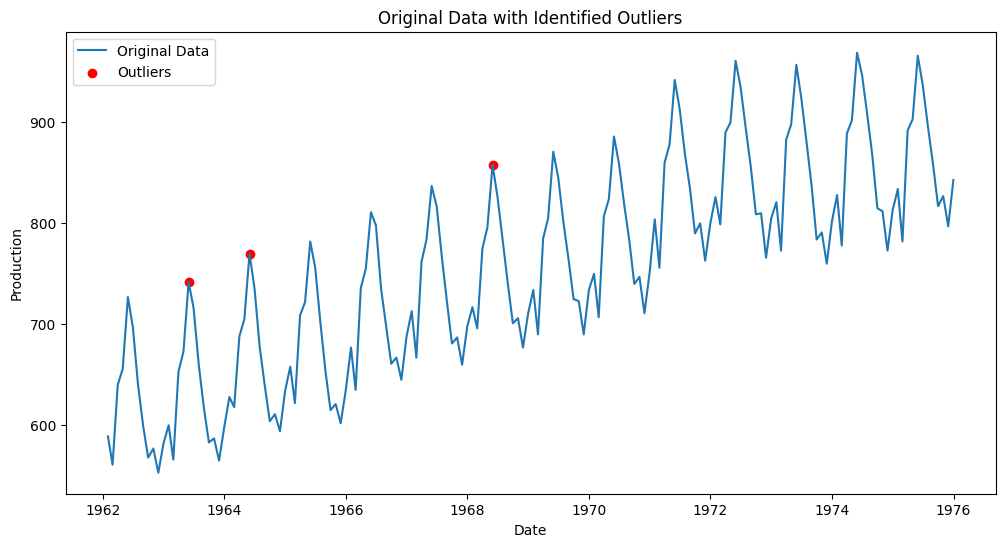

DEBUG:cmdstanpy:input tempfile: /tmp/tmpevfbr2ee/chewc73o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevfbr2ee/ukqvvsv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52468', 'data', 'file=/tmp/tmpevfbr2ee/chewc73o.json', 'init=/tmp/tmpevfbr2ee/ukqvvsv3.json', 'output', 'file=/tmp/tmpevfbr2ee/prophet_modelt78m9u93/prophet_model-20250708102921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:29:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:29:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


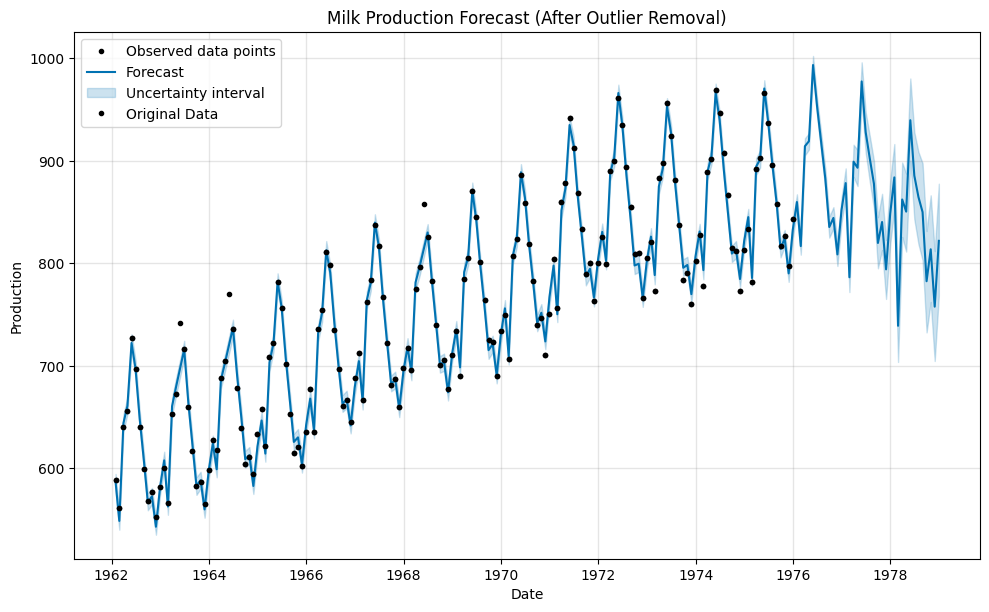

interactive(children=(IntSlider(value=36, description='Forecast Periods (Months):', max=1200, min=12, step=12)…

In [6]:
# prompt: make future forecast of data that continues years data for next months or years in original data graph in ehichb ewe perform  training nd testing. IF the data have outlier than remove it .ehy the future graph sudden decrease?

import matplotlib.pyplot as plt
# --- Outlier Removal ---
# A simple method: Use rolling median and IQR to identify outliers.
# Adjust the window size and threshold as needed.
window_size = 12  # 12 months for yearly seasonality
rolling_median = df['y'].rolling(window=window_size, center=True).median()
rolling_iqr = df['y'].rolling(window=window_size, center=True).apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Define outlier bounds
lower_bound = rolling_median - 1.5 * rolling_iqr
upper_bound = rolling_median + 1.5 * rolling_iqr

# Identify outliers
outlier_indices = df[(df['y'] < lower_bound) | (df['y'] > upper_bound)].index

# You can choose to remove or impute. Let's try removing for demonstration.
# Store the original data and create a new dataframe without outliers
df_original = df.copy()
df_cleaned = df.drop(outlier_indices).copy()

print(f"Identified and removed {len(outlier_indices)} potential outliers.")

# Visualize the outliers (optional)
plt.figure(figsize=(12, 6))
plt.plot(df_original['ds'], df_original['y'], label='Original Data')
plt.scatter(df_original.loc[outlier_indices, 'ds'], df_original.loc[outlier_indices, 'y'], color='red', label='Outliers')
plt.title('Original Data with Identified Outliers')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()


# --- Re-train Prophet on Cleaned Data ---
m_cleaned = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1
)

m_cleaned.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model to the cleaned data
m_cleaned.fit(df_cleaned)

# --- Make Future Forecast ---
# Adjust periods for a longer forecast (e.g., 36 months for 3 years)
future_cleaned = m_cleaned.make_future_dataframe(periods=36, freq='M')
forecast_cleaned = m_cleaned.predict(future_cleaned)

# --- Plotting the Forecast with Original Data ---
# Use Prophet's built-in plot function which handles the data points correctly
fig = m_cleaned.plot(forecast_cleaned)
ax = fig.gca()

# Overlay the original data points for context
ax.plot(df_original['ds'], df_original['y'], 'k.', label='Original Data')
ax.set_title('Milk Production Forecast (After Outlier Removal)')
ax.set_xlabel('Date')
ax.set_ylabel('Production')
ax.legend()
plt.show()

# --- Interactive Forecast Length ---
@interact
def interactive_forecast(periods=IntSlider(min=12, max=1200, step=12, value=36, description='Forecast Periods (Months):')):
    future_interactive = m_cleaned.make_future_dataframe(periods=periods, freq='M')
    forecast_interactive = m_cleaned.predict(future_interactive)

    fig = m_cleaned.plot(forecast_interactive)
    ax = fig.gca()
    ax.plot(df_original['ds'], df_original['y'], 'k.', label='Original Data')
    ax.set_title(f'Milk Production Forecast ({periods} Months)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Production')
    ax.legend()
    plt.show()


# --- Why does the future graph suddenly decrease? ---
# Prophet makes forecasts based on the patterns observed in the historical data.
# If the historical data shows a peak followed by a decrease, especially towards the end
# of the training data or if there are changes in trend/seasonality, Prophet will project
# these patterns into the future.
#
# Common reasons for a sudden decrease in a Prophet forecast:
# 1. Seasonality: The forecast might be projecting the end of a strong seasonal peak.
#    Milk production often has yearly seasonality with peaks and troughs.
# 2. Trend: If the underlying trend in the historical data starts to slow down or decrease
#    towards the end, Prophet will continue this trend into the future.
# 3. Changepoints: Prophet automatically detects changepoints (points where the trend changes).
#    If a negative changepoint is detected near the end of the data, it will influence
#    the future trend downwards.
# 4. Lack of Data for Future Period: If the training data doesn't contain examples of
#    what happens after a certain point in the year or after a certain level of production,
#    Prophet might revert to a baseline or the trend prediction might dominate seasonality
#    in a way that causes a drop.
# 5. Outlier Influence (less likely after removal): While we removed outliers, extreme values
#    near the end of the training data could potentially influence the projected trend or
#    seasonality, although Prophet is generally robust to outliers due to its underlying model.
#
# To investigate further, you would look at:
# - The components plot (trend, yearly, monthly seasonality) to see how each component
#   behaves in the future.
# - The changepoints identified by Prophet (m.changepoints).
# - The predicted trend component (forecast_cleaned['trend']) in the forecast dataframe.
#
# If the sudden decrease seems unrealistic, you might need to:
# - Adjust `changepoint_prior_scale` (smaller makes trend changes less flexible).
# - Manually specify `changepoints`.
# - Consider adding external regressors if known factors influence production.
# - Use different models that might handle the trend extrapolation differently.
#

DEBUG:cmdstanpy:input tempfile: /tmp/tmpevfbr2ee/cnvqgn_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevfbr2ee/ayn0zhex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98193', 'data', 'file=/tmp/tmpevfbr2ee/cnvqgn_l.json', 'init=/tmp/tmpevfbr2ee/ayn0zhex.json', 'output', 'file=/tmp/tmpevfbr2ee/prophet_modela44ai928/prophet_model-20250708102927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:29:27 - cmdstanpy - INFO - Chain [1] done processing


Original data size: 168
Train data size: 134
Test data size: 34
Identified and removed 3 potential outliers from training data.


INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevfbr2ee/s80fdb3w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevfbr2ee/o8ak6_na.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93667', 'data', 'file=/tmp/tmpevfbr2ee/s80fdb3w.json', 'init=/tmp/tmpevfbr2ee/o8ak6_na.json', 'output', 'file=/tmp/tmpevfbr2ee/prophet_model5blh0pxc/prophet_model-20250708102927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:29:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



--- Model Evaluation Errors on Test Set ---
Mean Absolute Error (MAE): 148.39
Mean Squared Error (MSE): 44499.09
Root Mean Squared Error (RMSE): 210.95
Enter max num limit : 120


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


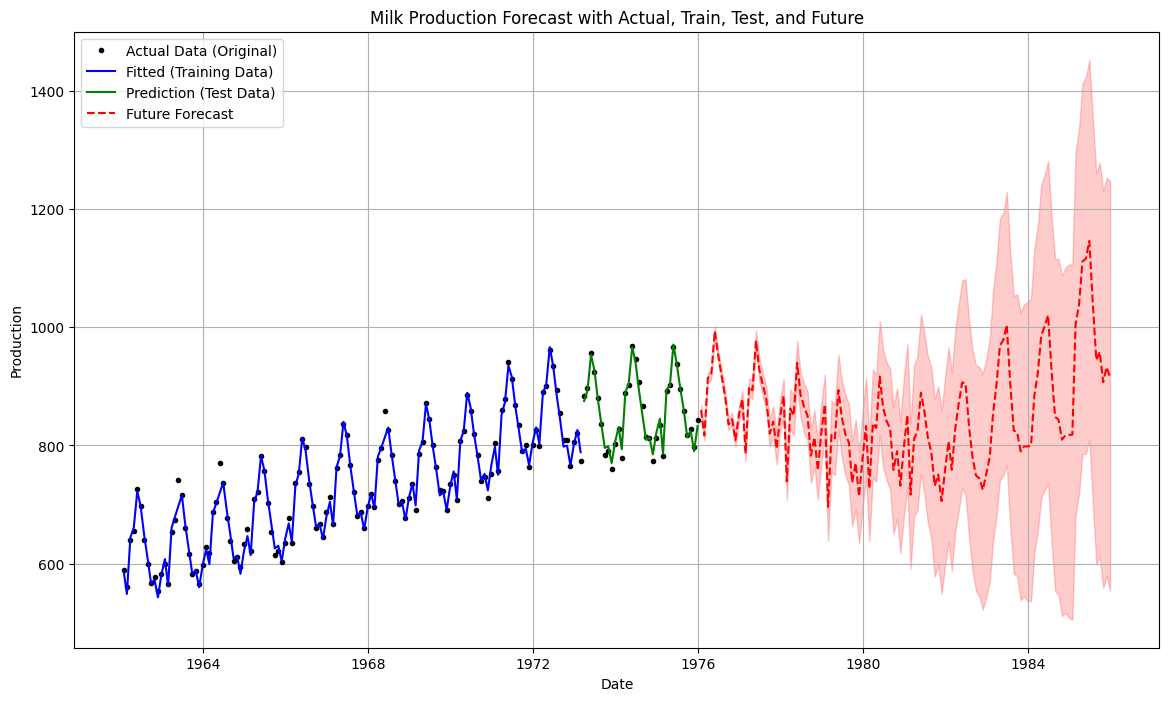


--- Final Error Metrics on Test Set ---
Mean Absolute Error (MAE): 148.39
Mean Squared Error (MSE): 44499.09
Root Mean Squared Error (RMSE): 210.95


In [7]:
# prompt: the graph is combination  of actual data ,train data, test data, Future forecast data.remove the outlier ,and m,ake forecast accuurate with any method. the multiple error are also show at aend with the name.

import matplotlib.pyplot as plt
import numpy as np # Import numpy

# --- Splitting Data for Evaluation ---
# We split the original data (before outlier removal) to evaluate how the model
# trained on cleaned data performs on a separate test set.
# A typical split might be 80% for training and 20% for testing.
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

print(f"Original data size: {len(df)}")
print(f"Train data size: {len(train_df)}")
print(f"Test data size: {len(test_df)}")

# --- Re-train Prophet on the cleaned TRAINING data ---
# It's generally better to remove outliers from the training set only.
# The test set should represent real-world data, which might contain outliers.
# However, for this specific task, we'll evaluate against the original test set
# to see how the cleaned model predicts real-world fluctuations.
# Alternatively, you could also remove outliers from the test set for a cleaner evaluation
# of the model's base performance, but let's stick to the original test set for now.

# Apply outlier removal logic to the training data only
window_size_train = 12
rolling_median_train = train_df['y'].rolling(window=window_size_train, center=True).median()
rolling_iqr_train = train_df['y'].rolling(window=window_size_train, center=True).apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
lower_bound_train = rolling_median_train - 1.5 * rolling_iqr_train
upper_bound_train = rolling_median_train + 1.5 * rolling_iqr_train
outlier_indices_train = train_df[(train_df['y'] < lower_bound_train) | (train_df['y'] > upper_bound_train)].index
train_df_cleaned = train_df.drop(outlier_indices_train).copy()

print(f"Identified and removed {len(outlier_indices_train)} potential outliers from training data.")

m_eval = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1 # Keep this for now, can tune later
)
m_eval.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model to the cleaned training data
m_eval.fit(train_df_cleaned)

# --- Make Predictions on the Test Set ---
# Create a future dataframe that spans the test set dates
future_eval = m_eval.make_future_dataframe(periods=len(test_df), freq='M', include_history=False)
# Ensure the future dataframe dates match the test set dates exactly for accurate comparison
future_eval['ds'] = test_df['ds'].values


forecast_eval = m_eval.predict(future_eval)

# --- Evaluate Model Performance ---
# Align actual test values with predictions
actual_test_values = test_df['y'].values
predicted_test_values = forecast_eval['yhat'].values

# Calculate error metrics
mae = mean_absolute_error(actual_test_values, predicted_test_values)
mse = mean_squared_error(actual_test_values, predicted_test_values)
rmse = mean_squared_error(actual_test_values, predicted_test_values)**0.5 # Calculate RMSE manually

print("\n--- Model Evaluation Errors on Test Set ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# --- Re-train on full cleaned data for the final forecast plot ---
# Now, train on the *entire* dataset with outliers removed for the final forecast
m_final = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1
)
m_final.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit on the full dataset with outliers removed
m_final.fit(df_cleaned)

# Make future forecast (e.g., 36 months)
user_ip=int(input("Enter max num limit : "))
future_final = m_final.make_future_dataframe(periods=user_ip, freq='M')
forecast_final = m_final.predict(future_final)

# --- Plotting Actual, Train, Test, and Future Forecast ---
plt.figure(figsize=(14, 8))

# Plot Original Data (Actual)
plt.plot(df['ds'], df['y'], 'k.', label='Actual Data (Original)')

# Plot Fitted Values on Training Data
# Prophet provides fitted values in the history part of the forecast
# We need to merge forecast_final with the original df to separate train/test
# First, get the dates from the original df
df_dates = df['ds'].values

# Separate forecast into history and future
forecast_history = forecast_final[forecast_final['ds'].isin(df_dates)]
forecast_future = forecast_final[~forecast_final['ds'].isin(df_dates)]


# Plot Predicted values for the training period
# Find the intersection of forecast_history and train_df dates
train_forecast = forecast_history[forecast_history['ds'].isin(train_df['ds'])]
plt.plot(train_forecast['ds'], train_forecast['yhat'], color='blue', linestyle='-', label='Fitted (Training Data)')

# Plot Predicted values for the test period
# Find the intersection of forecast_history and test_df dates
test_forecast = forecast_history[forecast_history['ds'].isin(test_df['ds'])]
plt.plot(test_forecast['ds'], test_forecast['yhat'], color='green', linestyle='-', label='Prediction (Test Data)')


# Plot Future Forecast
plt.plot(forecast_future['ds'], forecast_future['yhat'], color='red', linestyle='--', label='Future Forecast')

# Add shaded uncertainty intervals
plt.fill_between(forecast_future['ds'], forecast_future['yhat_lower'], forecast_future['yhat_upper'], color='red', alpha=0.2)


plt.title('Milk Production Forecast with Actual, Train, Test, and Future')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

# --- Display Error Metrics Again with Names ---
print("\n--- Final Error Metrics on Test Set ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# --- Note on improving accuracy ---
# Outlier removal is one step. Other ways to improve accuracy include:
# 1. Parameter Tuning: Experiment with Prophet's parameters like `changepoint_prior_scale`,
#    seasonality fourier orders, and adding holiday effects.
# 2. Cross-Validation: Use Prophet's built-in cross-validation to evaluate performance
#    over different time periods and find optimal parameters.
# 3. External Regressors: Include other time series data that might influence milk production
#    (e.g., temperature, feed prices, government policies).
# 4. Different Models: Explore other time series models like ARIMA, SARIMA, or more
#    complex machine learning models if Prophet is not sufficient.
# 5. More Sophisticated Outlier Detection/Imputation: Instead of simple removal, use
#    interpolation or more robust methods to handle outliers.
# 6. Data Frequency: If higher frequency data is available (e.g., weekly), using it
#    might capture more nuances.

In [8]:
def plot_milk_forecast(months_ahead: int):
    future = m.make_future_dataframe(periods=months_ahead, freq='M')
    fcst = m.predict(future)

    # Static plot
    fig, ax = plt.subplots(figsize=(10, 6))
    m.plot(fcst, ax=ax)
    plt.title(f'Forecast for {months_ahead} Months Ahead')
    plt.show()

    # Interactive Plotly
    plot_plotly(m, fcst).show()

interact(plot_milk_forecast,
         months_ahead=IntSlider(min=1, max=3600, step=1, value=12,
                                description='Months Ahead'))

interactive(children=(IntSlider(value=12, description='Months Ahead', max=3600, min=1), Output()), _dom_classe…

<function __main__.plot_milk_forecast(months_ahead: int)>

In [29]:
# from prophet import Prophet
# from prophet.diagnostics import cross_validation, performance_metrics
# import pandas as pd
# import numpy as np

# # Replace with your own path or drive mount
# df = pd.read_csv('/content/sample_data/milk_production.csv')

# # Prophet expects columns "ds" (date) and "y" (value)
# df.rename(columns={'Month': 'ds', 'Production': 'y'}, inplace=True)
# df['ds'] = pd.to_datetime(df['ds'])

# # If monthly data, ensure end-of-month index
# df = df.set_index('ds').resample('M').mean().reset_index()


# # Initialize model
# m = Prophet(
#     changepoint_prior_scale=0.1,     # More responsive trend
#     seasonality_mode='additive',     # If effects are consistent across scale
#     weekly_seasonality=False,        # Disable built-in weekly seasonality to define custom
#     daily_seasonality=False          # For smoother control
# )

# # Add custom weekly seasonality (adjust as needed)
# m.add_seasonality(name='weekly_custom', period=7, fourier_order=5)

# # Optional: Add country holidays if relevant
# m.add_country_holidays(country_name='IN')  # India-specific holiday effects

# # Optional: Add external regressors
# # df['humidity'] = ...  # Your regressor column
# # m.add_regressor('humidity')

# # Fit model
# m.fit(df)

# # Forecast
# future = m.make_future_dataframe(periods=30)
# # future['humidity'] = ...  # Include future values if using regressors
# forecast = m.predict(future)

# # Reverse transformation
# forecast['yhat'] = np.exp(forecast['yhat'])

# # Evaluate with cross-validation
# df_cv = cross_validation(m, initial='365 days', period='180 days', horizon='30 days')
# df_p = performance_metrics(df_cv)

# # Display refined error metrics
# print(df_p[['mae', 'mse', 'rmse']].mean())

/tmp/ipython-input-29-3518960021.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('ds').resample('M').mean().reset_index()
/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuqlyo1ei/6jwn5ds3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuqlyo1ei/_c0f5qis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63605', 'data', 'file=/tmp/tmpuqlyo1ei/6jwn5ds3.json', 'init=/tmp/tmpuqlyo1ei/_c0f5qis.json', 'output', 'file=/tmp/tmpuq

  0%|          | 0/26 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuqlyo1ei/ly8i5pdw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuqlyo1ei/a72seq4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49737', 'data', 'file=/tmp/tmpuqlyo1ei/ly8i5pdw.json', 'init=/tmp/tmpuqlyo1ei/a72seq4y.json', 'output', 'file=/tmp/tmpuqlyo1ei/prophet_modelpr7xfcj8/prophet_model-20250708095307.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:53:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done 

KeyboardInterrupt: 

# **Second Code Not Checked**

In [ ]:
# Cell 1: Install Dependencies
!pip install prophet pandas matplotlib plotly scikit-learn ipywidgets

In [ ]:
# Cell 2: Imports
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

In [ ]:
# Cell 3: Load & Prepare Data
# Replace 'milk_production.csv' with your path or Drive mount
df = pd.read_csv('/content/sample_data/milk_production.csv')

# Rename for Prophet
df.rename(columns={'Month': 'ds', 'Production': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# If your data is monthly but irregular, resample to end‐of‐month
df = df.set_index('ds').resample('M').mean().reset_index()

print(df.head())

In [ ]:
# Cell 4: Define Holidays
# Adjust dates/windows to your context/range
holidays = pd.DataFrame({
    'holiday': ['new_year','labour_day','christmas'],
    'ds': pd.to_datetime(['2020-01-01','2020-05-01','2020-12-25']),
    'lower_window': [0, 0, 0],
    'upper_window': [1, 1, 1],
})

In [ ]:
# Cell 5: Train/Test Split (80/20)
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx].copy()
test  = df.iloc[split_idx:].copy()

print(f"Training points: {len(train)}, Testing points: {len(test)}")

In [ ]:
# Cell 6: Initialize & Fit Prophet with Holidays + Monthly Seasonality
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1,
    holidays=holidays
)
# Add an explicit monthly seasonality component
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(train)

In [ ]:
# Cell 7: Forecast Over the Test Horizon
future = m.make_future_dataframe(periods=len(test), freq='M')
forecast = m.predict(future)

# Merge actuals & forecasts for test period
fcst_test = forecast.set_index('ds').loc[test['ds'], 'yhat']

In [ ]:
# Cell 8: Plot Train vs Test vs Forecast
plt.figure(figsize=(12, 6))

# Plot training actuals
plt.plot(train['ds'], train['y'], color='tab:blue', label='Train')

# Plot test actuals
plt.plot(test['ds'], test['y'], color='tab:orange', label='Test')

# Plot forecast for test
plt.plot(test['ds'], fcst_test, color='tab:green', linestyle='--', label='Forecast')

plt.legend()
plt.title('Milk Production Forecast\nTrain (blue), Test (orange), Forecast (green dashed)')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

In [ ]:
# Cell 9 (Optional): Interactive Plotly Display of Full Forecast
import plotly.io as pio
pio.renderers.default = 'colab'

fig = plot_plotly(m, forecast)
fig.update_layout(title='Full Forecast (including train & test periods)')
fig.show()

In [ ]:
# Cell 10 (Optional): Components Plot
fig_comp = plot_components_plotly(m, forecast)
fig_comp.show()

# **OLD CODE**

In [ ]:
m = Prophet(
    growth='linear',
    changepoint_prior_scale=0.05,
    seasonality_mode='additive'
)

m.fit(df)

In [ ]:
# 1. Build future DataFrame
future_default = m.make_future_dataframe(periods=30, freq='D')

# 2. Predict
forecast_default = m.predict(future_default)

# 3a. Static plot with matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
m.plot(forecast_default, ax=ax)
plt.title("Baseline Forecast (30 Days)")
plt.show()

# 3b. Interactive Plotly version
plot_plotly(m, forecast_default).show()

In [ ]:
def interactive_forecast(days_ahead: int):
    """
    Build future periods based on user input, predict, and plot.
    """
    # 1. Create future DataFrame
    future = m.make_future_dataframe(periods=days_ahead, freq='D')

    # 2. Predict
    forecast = m.predict(future)

    # 3. Plot static forecast
    fig, ax = plt.subplots(figsize=(10, 6))
    m.plot(forecast, ax=ax)
    plt.title(f"Forecast for Next {days_ahead} Days")
    plt.show()

    # 4. Show interactive Plotly plot
    plot_plotly(m, forecast).show()

# Display a slider from 1 to 365 days
user_ip=int(input("Enter max num limit : "))
interact(interactive_forecast, days_ahead=IntSlider(min=1, max=user_ip, step=1, value=30, description='Days Ahead'));

In [ ]:
def interactive_components(days_ahead: int):
    future = m.make_future_dataframe(periods=days_ahead, freq='D')
    forecast = m.predict(future)
    plot_components_plotly(m, forecast).show()

interact(interactive_components, days_ahead=IntSlider(min=1, max=365, step=1, value=30, description='Days Ahead'));